In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./Data/Annual_Parking_Study_Data.csv')
df['raw'].shape


/home/bok/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(95218, 24)

In [3]:
df['raw'].iloc[0]

Elmntkey                                                            1577
Study_Area                                            12th Ave - Weekday
Sub_Area                                                             NaN
Study Date                                                      4/8/2014
Study_Time                                                       2:00 PM
Side                                                                   W
Unitdesc                  12TH AVE BETWEEN E COLUMBIA ST AND E MARION ST
Parking_Category                                            Paid Parking
Peak Hour_SDOT                                                       NaN
Parking_Spaces                                                         8
Total_Vehicle_Count                                                    9
Dp_Count                                                               7
Rpz_Count                                                            NaN
TG_Car2Go                                          

# Data cleaning

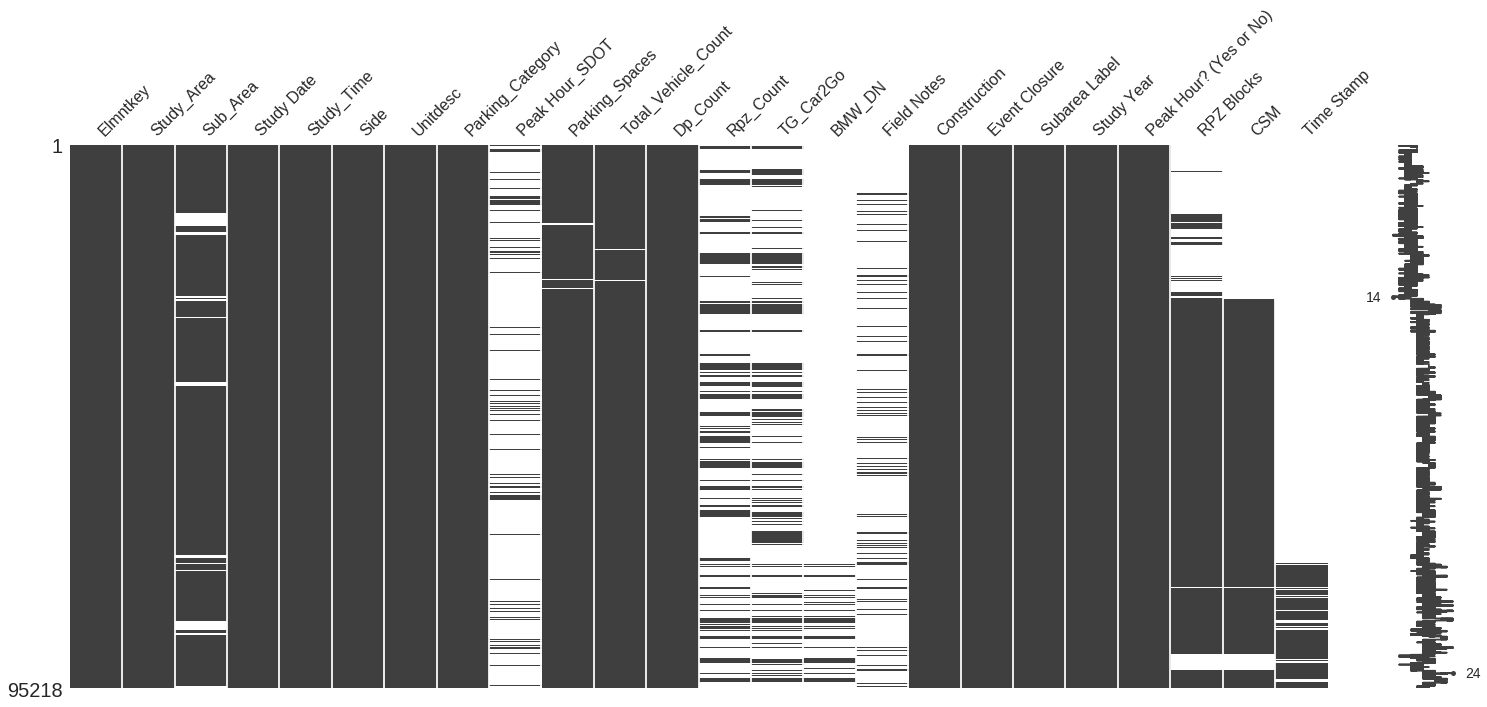

In [4]:
msno.matrix(df['raw'])

In [5]:
NA = df['raw'].shape[0] - df['raw'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		95108
Percent of lines containing N/A:	99.88%


There are some columns, which mostly contains missing values. Thees identify as Peak_Hour_SDOT, RPZ_Count, TG_Car2Go, BMW_DN, Field Notes and Time Stamp. Further more it is worth investegating the columns Sub_Area, RPZ_Blocks and CSM.

## Time stamp investegation
Time stamp has alot of missing values. It would be interesting to see, if timestamps has a relation with the study_Time, Study Date and Study Year columns.

In [6]:
NA = df['raw']['Time Stamp'].shape[0] - df['raw']['Time Stamp'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		76340
Percent of lines containing N/A:	80.17%


In [7]:
df['raw'][df['raw']['Time Stamp'].notnull()].head()[['Time Stamp','Study_Time','Study Date','Study Year']]

,Time Stamp,Study_Time,Study Date,Study Year
36373,0.894028,9:00 PM,5/24/2016,2016
72494,0.754861,6:00 PM,4/5/2016,2016
72647,0.793750,7:00 PM,4/5/2016,2016
72973,0.877778,9:00 PM,4/5/2016,2016
73339,0.638194,3:00 PM,4/5/2016,2016


The time stamp seem to be of a different type than date time. As no information is provided as to what format the timestamp values have, and the column is 80% missing values, a new timestamp will be created from study time and study date columns. This new timestamp column will be used as index

In [8]:
df['fixed'] = df['raw'].drop('Time Stamp',axis=1)
df['fixed']['Time stamp'] = pd.to_datetime(df['raw']['Study_Time'] + ' ' + df['raw']['Study Date'])
df['fixed'] = df['fixed'].drop(['Study_Time','Study Date','Study Year'],axis=1)
df['fixed'] = df['fixed'].set_index('Time stamp')
df['fixed'].sort_index(inplace=True)

In [9]:
df['fixed'].head()

,Elmntkey,Study_Area,Sub_Area,Side,Unitdesc,Parking_Category,Peak Hour_SDOT,Parking_Spaces,Total_Vehicle_Count,Dp_Count,Rpz_Count,TG_Car2Go,BMW_DN,Field Notes,Construction,Event Closure,Subarea Label,Peak Hour? (Yes or No),RPZ Blocks,CSM
Time stamp,,,,,,,,,,,,,,,,,,,,
2014-04-08 08:00:00,24558,12th Ave - Weekday,NaN,E,12TH AVE BETWEEN E MARION ST AND E SPRING ST,Paid Parking,NaN,8.0,1.0,0,NaN,NaN,NaN,delivery vehicle,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,24553,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,Paid Parking,NaN,7.0,3.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,69437,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,Paid Parking,NaN,4.0,2.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,46725,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E JEFFERSON ST AND E BARCLAY CT,Paid Parking,NaN,5.0,0.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,69441,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E SPRING ST AND E MADISON ST,Paid Parking,NaN,3.0,0.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN


Now the data is sorted by date, and the 2 columns Study_Time and Study Date has been removed.
It makes sense to make a new missing value matrix, to get a better understanding of the missing values versus time.

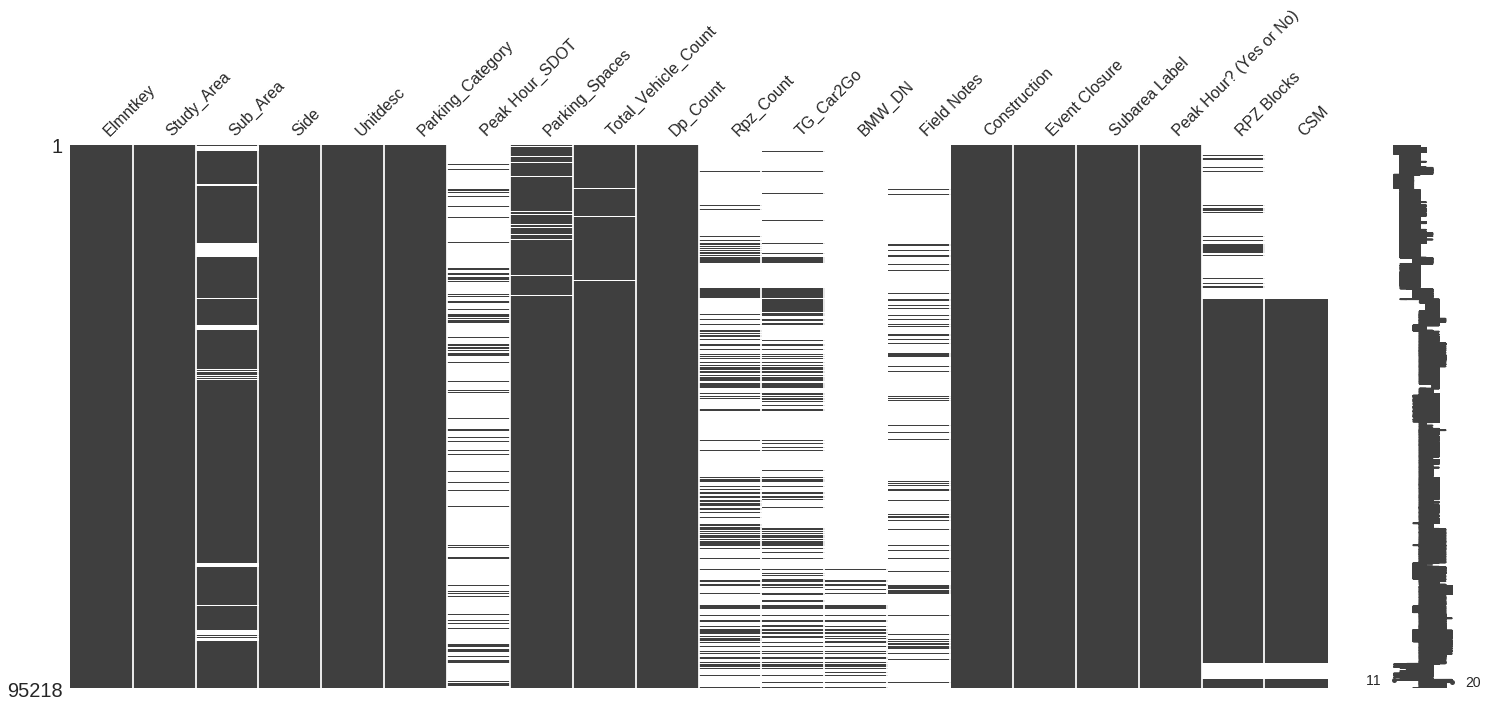

In [10]:
msno.matrix(df['fixed'])

In [11]:
NA = df['fixed'].shape[0] - df['fixed'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		95089
Percent of lines containing N/A:	99.86%


The data has been slighty rearanged when sorting by the new timestamp column.
The amount of missing value rows has not changed at this point.

## Exploration of the unknown columns
Before making a decision, it would be usefull to investegate what data associated with each of the columns.  
The data did not come with a description, which means we will have to look at the data and try to interpret meaning and usefullness for our case.

In [12]:
# clumns names to drop. Column names will be added after evaluation of each.
dropList = []

### Peak Hour_SDOT

In [13]:
NA = df['fixed']['Peak Hour_SDOT'].shape[0] - df['fixed']['Peak Hour_SDOT'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Peak Hour_SDOT'].value_counts().head(10)

Amount of lines containing N/A:		84420
Percent of lines containing N/A:	88.66%


6-9AM 3-7PM       2592
3-7PM             1939
7-9AM             1504
4-6PM             1391
6-9AM 3-6PM        758
6-9AM              754
                   544
7-9AM 4-6PM        511
3-6PM              456
6-9AM 3-6:30PM     173
Name: Peak Hour_SDOT, dtype: int64

This column seem to provide information, as to the busiest hours for the area. This is a very interesting column, but because nearly 90% of the data is missing, we choose to remove this column from the main dataset.   
A dataset with peakhours will also be made, after the cleaning, to explore the possibility to predict the mising values. It is noted, that a binary "is peak hour" column also exists, which could be used to generate the peak hours category.

In [14]:
dropList.append('Peak Hour_SDOT')

### TG_Car2Go

In [15]:
NA = df['fixed']['TG_Car2Go'].shape[0] - df['fixed']['TG_Car2Go'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['TG_Car2Go'].value_counts().head(10)

Amount of lines containing N/A:		68736
Percent of lines containing N/A:	72.19%


0.0    21374
1.0     4040
2.0      781
3.0      174
4.0       66
5.0       22
7.0        9
6.0        8
9.0        4
8.0        4
Name: TG_Car2Go, dtype: int64

Car 2 go is a car sharing service. This is not relevant for our use, and furthermore the columns does not seem to be interpreted.  
This column is marked as a drop column, with no second thoughts.

In [16]:
dropList.append('TG_Car2Go')

### BMW_DN

In [17]:
NA = df['fixed']['BMW_DN'].shape[0] - df['fixed']['BMW_DN'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))
df['fixed']['BMW_DN'].value_counts().head(10)

Amount of lines containing N/A:		89461
Percent of lines containing N/A:	93.95%


0.0    5240
1.0     479
2.0      18
3.0      10
4.0       9
5.0       1
Name: BMW_DN, dtype: int64

This column only has 5 different values. As we are unable to interpret what it means, this column is also marked for drop.

In [18]:
dropList.append('BMW_DN')

### Rpz_Count and RPZ Blocks
It is assumed that RPZ has the same meaning in this context. It makes sense to investegate the two RPZ columns together.

In [19]:
NA = df['fixed']['Rpz_Count'].shape[0] - df['fixed']['Rpz_Count'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Rpz_Count'].value_counts().head(10)

Amount of lines containing N/A:		70264
Percent of lines containing N/A:	73.79%


0.0    18386
4.0      988
3.0      960
1.0      857
5.0      834
2.0      790
6.0      651
7.0      525
8.0      401
9.0      204
Name: Rpz_Count, dtype: int64

In [20]:
NA = df['fixed']['RPZ Blocks'].shape[0] - df['fixed']['RPZ Blocks'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['RPZ Blocks'].value_counts().head(10)

Amount of lines containing N/A:		25315
Percent of lines containing N/A:	26.59%


0.0                        47132
0                           5629
Restricted Parking Zone     4578
21                          3940
4                           2298
13.0                        1913
7                           1462
24                           749
27                           728
2                            601
Name: RPZ Blocks, dtype: int64

RPZ only has one solid lead, this is the value "Restricted Parking Zone", found in the blocks column. This could indicate this is a form of "parking ticket" column. Our focus is only on legal means of parking, and therefore the RPZ columns is added to the drop list.

In [21]:
dropList.append('Rpz_Count')
dropList.append('RPZ Blocks')

### CSM

In [22]:
NA = df['fixed']['CSM'].shape[0] - df['fixed']['CSM'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['CSM'].value_counts().head(10)

Amount of lines containing N/A:		29867
Percent of lines containing N/A:	31.37%


Y                                                                                                          58896
N                                                                                                           6429
parking, paid, load (0,0,0 to 20,20,17)                                                                       12
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1)                                                              4
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 3m (25,0 to 24,1), moved 4 from paid to other        2
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (21,4 to 18,7)                                   2
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (25,3 to 18,10)                                  1
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (24,5 to 18,11)                                  1
parking, paid, load (0,0,0 to 20,20,17); total,30m (23,6 to 20,10)                              

This column has something to do with the parking zone. The biggest part of the data is marked Y and the second largest part is marked N. As there is no clue as to what is being asked, the column is also marked for drop.

In [23]:
dropList.append('CSM')

### Field notes
This field is suspected to hold notes taken by the observer. To confirm this, the first few notes will be investegated.

In [24]:
NA = df['fixed']['Field Notes'].shape[0] - df['fixed']['Field Notes'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Field Notes'].dropna().head(10)

Amount of lines containing N/A:		84369
Percent of lines containing N/A:	88.61%


Time stamp
2014-04-08 08:00:00                                     delivery vehicle
2014-04-08 08:00:00                                 schoolbus in loading
2014-04-08 08:00:00                       one school bus counted as paid
2014-04-08 09:00:00                               delivery truck in load
2014-04-08 10:00:00                   parking enforcement marked as paid
2014-04-08 12:00:00                             delivery in load - large
2014-04-08 13:00:00                                    parking attendant
2014-04-08 14:00:00                                   long utility truck
2014-04-08 15:00:00    south-pointing truck parked in center lane(not...
2014-04-08 16:00:00                                 1 motorcycle in paid
Name: Field Notes, dtype: object

As suspected, this is notes for the observation. This is not usefull information for us, and is marked for drop.

In [25]:
dropList.append('Field Notes')

## Cleaning
Now the columns has been marked for drop, a clean version of the dataset can be made.

In [26]:
df['clean'] = df['fixed'].drop(dropList,axis=1) 

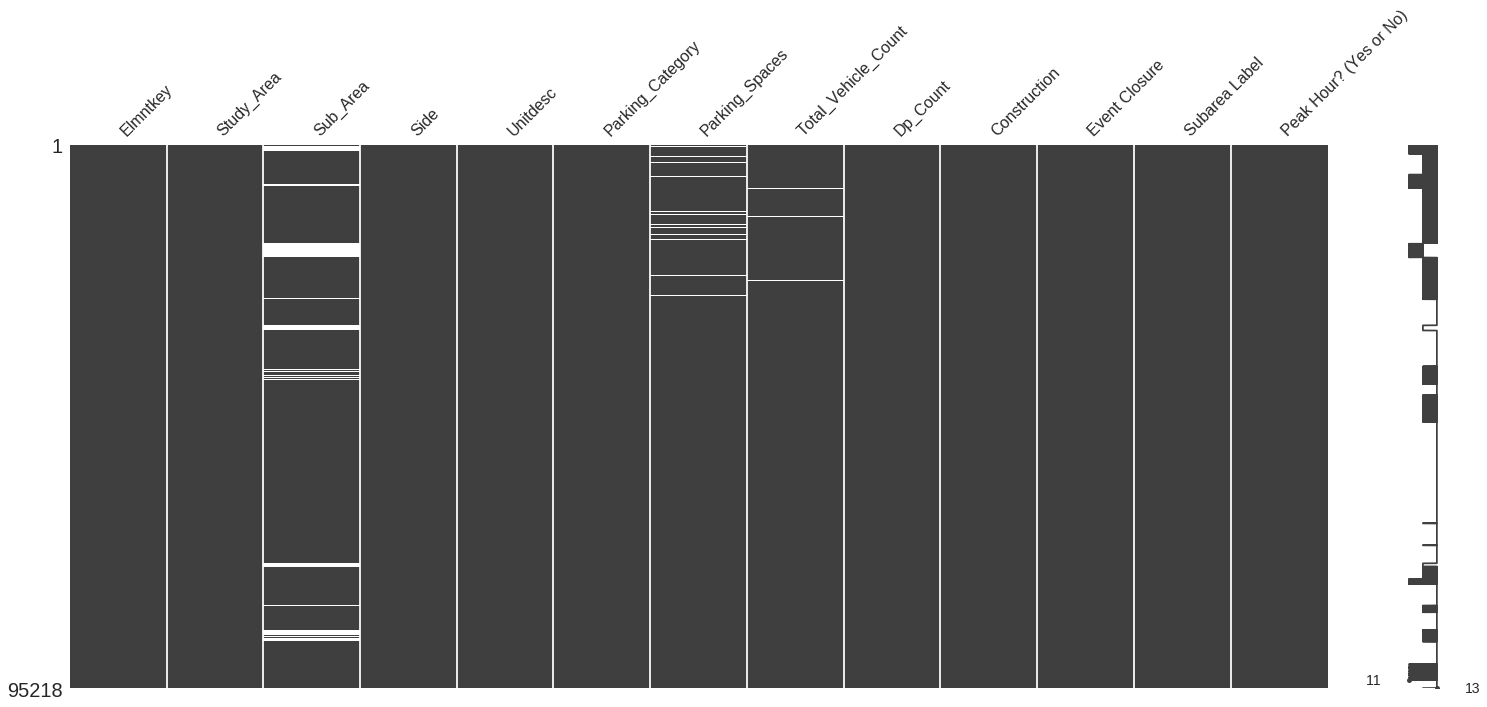

In [27]:
msno.matrix(df['clean'])

In [29]:
NA = df['clean'].shape[0] - df['clean'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

Amount of lines containing N/A:		9450
Percent of lines containing N/A:	9.92%


### Sub Area
As 

In [30]:
df['clean']['Sub_Area'].value_counts().head(10)

North        14070
Paid         11867
Unpaid       10695
Core         10663
Edge         10206
South         7578
Periphery     6461
Retail        4316
2             2314
Financial     2101
Name: Sub_Area, dtype: int64

In [33]:
NA = df['clean'].drop('Sub_Area',axis=1).shape[0] - df['clean'].drop('Sub_Area',axis=1).dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

Amount of lines containing N/A:		1579
Percent of lines containing N/A:	1.66%
